In [3]:
import sys
import os

sys.path.append(os.path.abspath("../"))

import jax.numpy as jnp
import jax.nn as jnn
from src.fd_scheme import fd_solve
from src.analytical import u_exact
from src.plotting import plot_solution, plot_training_loss, plot_all_heatmaps
from src.nn.model import MLP
from src.nn.train import train_pinn
from src.nn.evaluation import compare_nn_and_exact, test_explicit_scheme
from src.experiment import run_architecture_sweep

# Part B
Plots for $\Delta x = 1/10$ and $\Delta t = 1/100$

In [ ]:
test_explicit_scheme(Nx=10, T=0.5, alpha=0.4, t1=0.07, t2=0.3)
test_explicit_scheme(Nx=100, T=0.5, alpha=0.4, t1=0.07, t2=0.3)

# Part C
Solving same problem as for part b, but now using PINNS

[step    0] loss = 4.175e-01
[step  500] loss = 1.471e-02
[step  999] loss = 1.039e-03


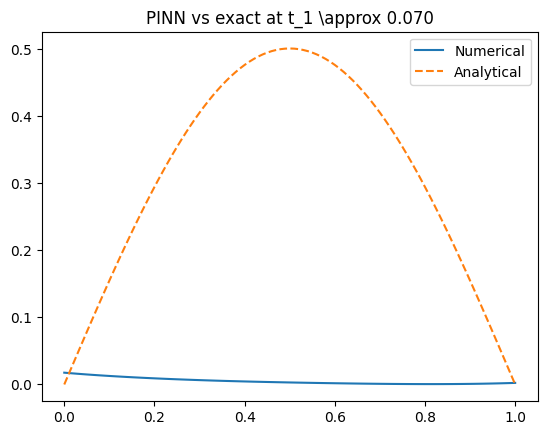

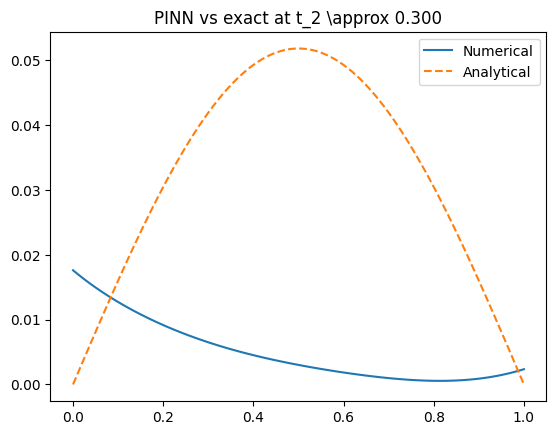

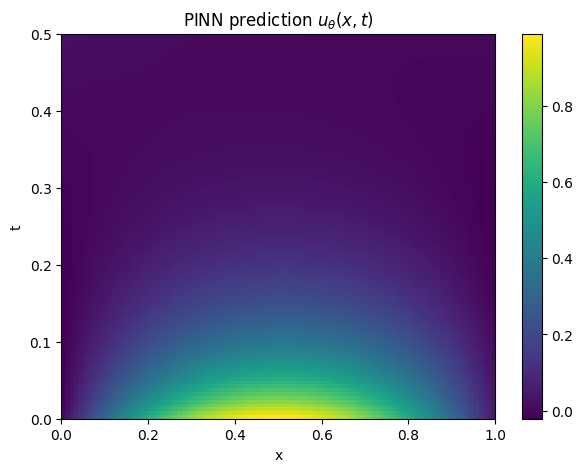

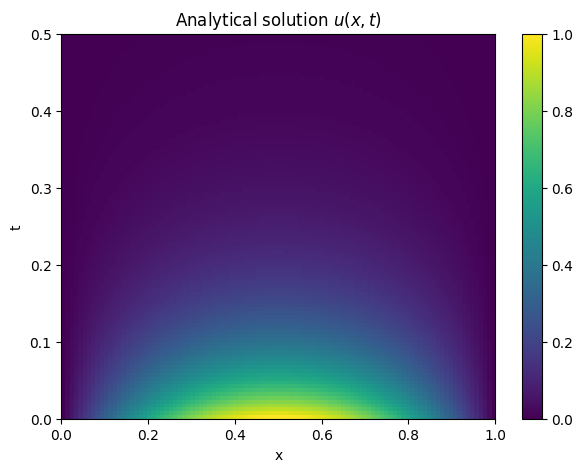

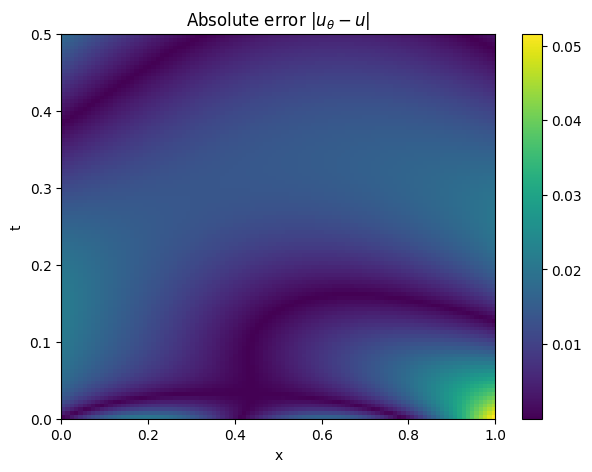

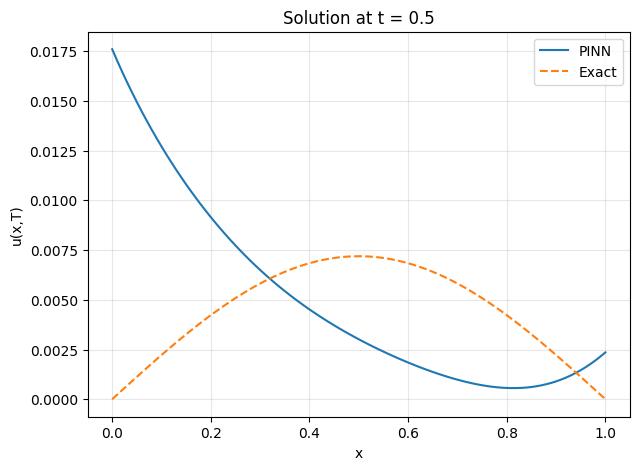

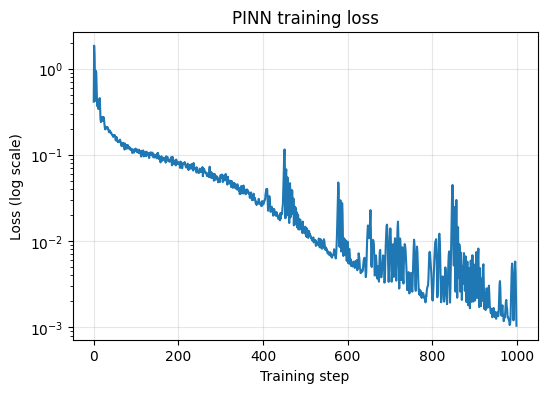

In [4]:
# ---------- Part c — PINN version of part b ----------
Nx = 100
T = 0.5

_, x, t = fd_solve(Nx=Nx, T=T, alpha=0.4)
u_true = u_exact(x, t)

t1, t2 = 0.07, 0.30
i1 = jnp.argmin(jnp.abs(t - t1))
i2 = jnp.argmin(jnp.abs(t - t2))

model, losses = train_pinn(
    layers=[2, 128, 128, 128, 128, 1], 
    steps=1000,
    N_int=1000,            
    N_ic=200,
    lambda_ic=1.0,
    lambda_bc=1.0,        
    lr=1e-3,
    nu=1.0, 
    c=0.0
)

u_pinn, _, _, _ = compare_nn_and_exact(model, Nx=Nx, T=T, return_only=True)


plot_solution(
    x,
    u_pinn[i1],
    u_true[i1],
    title=rf"PINN vs exact at t_1 \approx {float(t[i1]):.3f}",
)

plot_solution(
    x,
    u_pinn[i2],
    u_true[i2],
    title=rf"PINN vs exact at t_2 \approx {float(t[i2]):.3f}",
)

compare_nn_and_exact(model, Nx=Nx, T=T)

plot_training_loss(losses)
